# EUC, more plots

1. Vertical profile of velocity at 140W
2. Same at 139E
3. bathymetry at equator
4. 20C isotherm at the equator

In [1]:
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pych.ecco as pe
import ecco_v4_py as ecco

In [2]:
grid_dir = '/workspace/grids/llc90/'
g = pe.read_mds(grid_dir,iters=None)

/workspace/xmitgcm/xmitgcm/mds_store.py:849: UserWarning: Couldn't find available_diagnostics.log in /workspace/grids/llc90/ or /workspace/grids/llc90/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


In [3]:
uvel_download_dir = '/workspace/ecco/release4/nctiles_monthly/UVELMASS/*/*.nc'
vvel_download_dir = '/workspace/ecco/release4/nctiles_monthly/VVELMASS/*/*.nc'

In [4]:
ds = xr.open_mfdataset(glob(uvel_download_dir)+glob(vvel_download_dir))

In [5]:
ds['UVELMASS'] = ds.UVELMASS.sel(time=slice('1993','2017')).mean('time').load();
ds['VVELMASS'] = ds.VVELMASS.sel(time=slice('1993','2017')).mean('time').load();

In [6]:
for fld in ['drF','dyG','dxG','XC','XG','Zl','Zu','Zp1']:
    ds[fld] = g[fld]
    ds = ds.set_coords(fld)

In [7]:
ds['dyG'].load();
ds['dxG'].load();
ds['drF'].load();
ds['XC'].load();
ds['YC'].load();

In [8]:
grid = ecco.get_llc_grid(g)

## Velocity profiles at 140W and 139E

In [9]:
params = {'font.size':16,
          'lines.linewidth':2}
plt.rcParams.update(params)

In [18]:
fig_dir = '/workspace/results/eccov4r4/equatorial-under-current/figures/'

In [10]:
lon1 = -140
lat1 = 1.5
lat2 = -1.5
tds = pe.calc_euc(ds=ds,pt1=[lon1,lat1],pt2=[lon1,lat2],grid=grid)

/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)


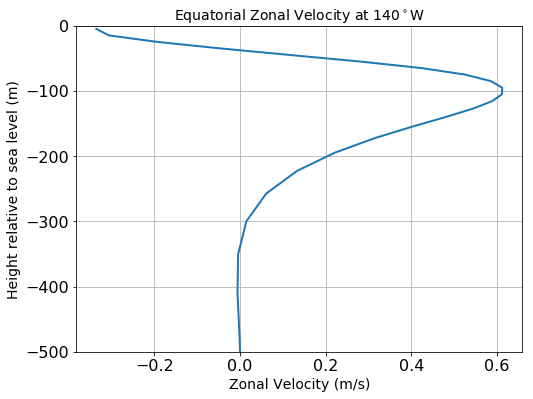

In [69]:
tds.v_eq.plot(y='Z',ylim=[-500,0],figsize=(8,6))
plt.ylabel('Height relative to sea level (m)')
plt.xlabel('Zonal Velocity (m/s)')
plt.title('Equatorial Zonal Velocity at 140$^\circ$W');
plt.grid();
plt.savefig(f'{fig_dir}/zonal_velocity_140w.png',bbox_inches='tight',dpi=300)

In [20]:
lon2=139
tds2 = pe.calc_euc(ds=ds,pt1=[lon2,lat1],pt2=[lon2,lat2],grid=grid)

/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)


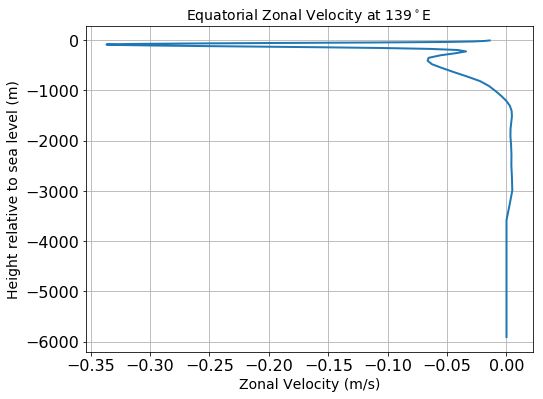

In [71]:
tds2.u_eq.plot(y='Z',figsize=(8,6))
plt.ylabel('Height relative to sea level (m)')
plt.xlabel('Zonal Velocity (m/s)')
plt.title('Equatorial Zonal Velocity at 139$^\circ$E');
plt.grid();
plt.savefig(f'{fig_dir}/zonal_velocity_139e.png',bbox_inches='tight',dpi=300)

In [27]:
tds2.maskW.where(tds2.maskW,drop=True).tile

<xarray.DataArray 'tile' (tile: 1)>
array([4])
Coordinates:
  * tile     (tile) int64 4
Attributes:
    standard_name:  face_index

## get velocity profiles at each longitude until we see the EUC

In [57]:
u_eq = []
v_eq = []
zonal_vel = []
lons = []

In [58]:
for lon in range(135,151):
    tt = pe.calc_euc(ds=ds,pt1=[lon,lat1],pt2=[lon,lat2],grid=grid)
    u_eq.append(tt.u_eq.values)
    v_eq.append(tt.v_eq.values)
    zonal_vel.append(tt.u_eq.values if not np.all(np.isnan(tt.u_eq.values)) else tt.v_eq.values)
    lons.append(lon)

/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)
/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)
/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)
/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)
/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s un

In [47]:
[print(np.all(np.isnan(x))) for x in u_eq]
[print(np.all(np.isnan(x))) for x in v_eq]

False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [60]:
zonal_vel = np.array(zonal_vel)
lons = np.array(lons)

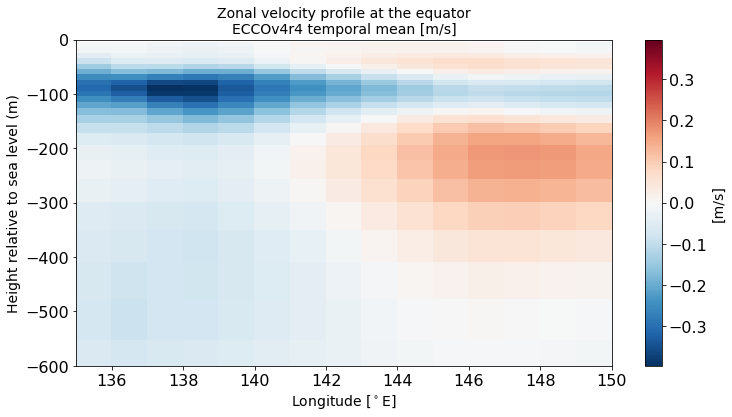

In [75]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
vmax = np.max(np.abs(zonal_vel))
sm = ax.pcolormesh(lons,ds.Z,zonal_vel.T,cmap='RdBu_r',vmin=-vmax,vmax=vmax)
ax.set_ylim([-600, 0])
cax = plt.colorbar(sm);
cax.set_label('[m/s]')
ax.set_ylabel('Height relative to sea level (m)')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_title('Zonal velocity profile at the equator\nECCOv4r4 temporal mean [m/s]');
fig.savefig(f'{fig_dir}/zonal_velocity_at_eq.png',bbox_inches='tight',dpi=300)

## Bathymetry